# Data Exploration & Cleaning

At Download the data.ipynb, we created a script to download all the raw data directly from https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page:

            * yellow_tripdata_2017-03.parquet
            * yellow_tripdata_2017-06.parquet
            * yellow_tripdata_2017-11.parquet
            
and we transform the format from .parquet to .csv., we concatenate the entire dataset and create a pickle to access the data.

In [1]:
# Libraries
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


from pandas.tseries.holiday import USFederalHolidayCalendar
import datetime as dt

import gc

import geopandas as gpd

In [2]:
# read dataset initial
trips = pd.read_pickle('../Data/raw_data/raw_data_2017.pkl')

# Data Exploration

In [4]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2017-03-01 00:38:16,2017-03-01 00:59:21,1,10.5,1,N,231,42,1,30.5,0.5,0.5,6.00,0.0,0.3,37.80,None,None
1,1,2017-03-01 00:25:01,2017-03-01 00:31:36,1,1.4,1,N,239,262,1,7.5,0.5,0.5,1.75,0.0,0.3,10.55,None,None
2,1,2017-03-01 00:43:48,2017-03-01 00:44:17,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,None,None
3,1,2017-03-01 00:47:17,2017-03-01 00:47:33,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,None,None
4,1,2017-03-01 00:13:37,2017-03-01 00:13:46,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,None,None


In [5]:
trips.shape

(29237237, 19)

In [6]:
trips.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07,2.923724e+07
mean,1.545916e+00,1.617837e+00,2.919382e+00,1.043349e+00,1.632024e+02,1.611910e+02,1.329499e+00,1.310928e+01,3.339417e-01,4.973105e-01,1.874053e+00,3.290105e-01,2.996283e-01,1.644708e+01
std,4.978872e-01,1.261040e+00,4.476505e+00,5.095050e-01,6.661408e+01,7.047813e+01,4.903464e-01,1.472796e+02,4.615720e-01,7.081616e-02,2.645560e+00,1.968867e+00,1.408884e-02,1.475227e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.371000e+01,-5.000000e-01,-1.120000e+02,-1.750000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.010000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,1.920000e+02,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,6.980000e+01,1.400000e+02,4.500000e+02,1.018950e+03,1.000000e+00,6.304631e+05


In [7]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29237237 entries, 0 to 29237236
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     object
airport_fee              object
dtypes: datetime64[ns](2), float64(8), int64(6), object(3)
memory usage: 4.1+ GB


### Missing values
​
We study the percentage of missing values in each feature, to eliminate possible features with an excess of missings.

% Missing: 
 airport_fee             1.0
congestion_surcharge    1.0
dtype: float64


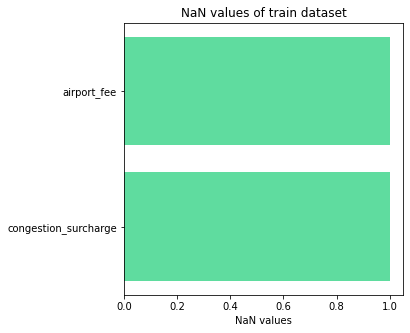

In [8]:
#Checking Missing Values in the features
n_features = trips.shape[1]
tot_reg = trips.shape[0]

# % Missing
nan_val = trips.isna().sum()[trips.isna().sum() > 0].sort_values(ascending=False)/tot_reg

print('% Missing: \n', nan_val)

fig, axs = plt.subplots(figsize=(5, 5))

sns.barplot(y = nan_val.index[0:n_features], 
            x = nan_val.values[0:n_features], 
            color = '#4af19f')

plt.title(f'NaN values of train dataset')
plt.xlabel('NaN values')
plt.show()

As we see, we have 2 features with 100% of missing values, so we proceed to eliminate them.

In [3]:
trips = trips.drop(['congestion_surcharge','airport_fee'],axis = 1)

# Data Cleaning

First, we clean the non cuantitative data related with the target.

##### Datetime


In [4]:
# Detect outliers in datetime
print('max tpep_pickup_datetime: ',trips['tpep_pickup_datetime'].max())
print('min tpep_pickup_datetime: ',trips['tpep_pickup_datetime'].min())

print('max tpep_dropoff_datetime: ',trips['tpep_dropoff_datetime'].max())
print('min tpep_dropoff_datetime: ',trips['tpep_dropoff_datetime'].min())

max tpep_pickup_datetime:  2041-11-15 02:57:16
min tpep_pickup_datetime:  2001-01-01 00:04:13
max tpep_dropoff_datetime:  2041-11-15 03:12:19
min tpep_dropoff_datetime:  2001-01-01 00:04:51


In [4]:
trips = trips[(trips['tpep_pickup_datetime'] >= '2017-03-01 00:00:00') 
    & (trips['tpep_pickup_datetime'] <= '2017-11-30 23:59:59') 
    & (trips['tpep_dropoff_datetime'] >= '2017-03-01 00:00:00') 
    & (trips['tpep_dropoff_datetime'] <= '2017-11-30 23:59:59')]

In [6]:
trips.shape

(29233161, 17)

##### Pickup & Dropoff dates

In [5]:
trips['tpep_pickup_date'] = trips['tpep_pickup_datetime'].dt.date
trips['tpep_dropoff_date'] = trips['tpep_dropoff_datetime'].dt.date

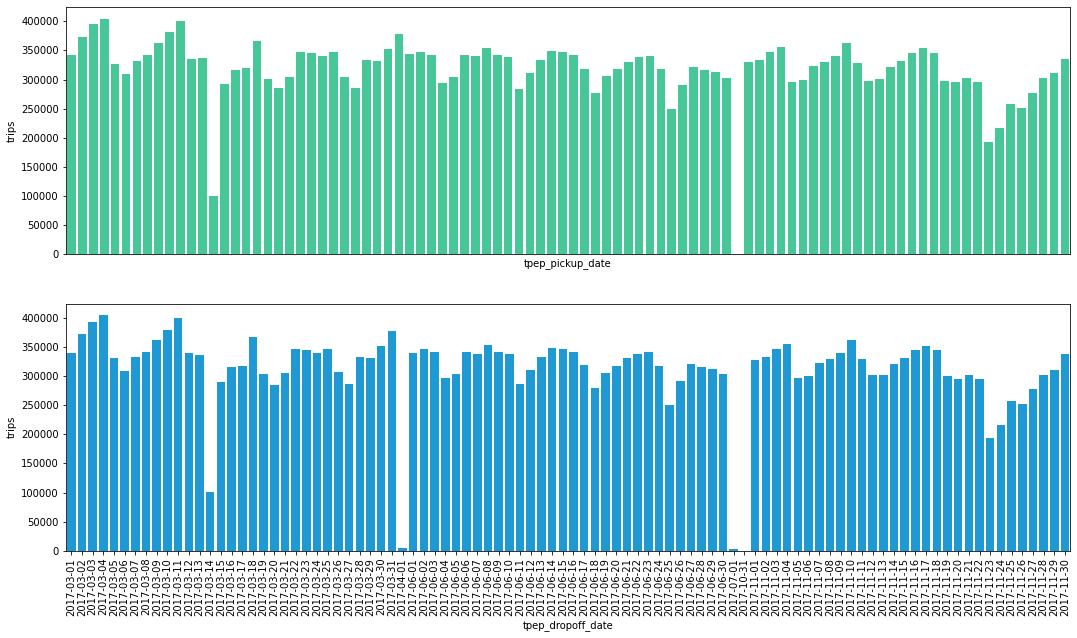

In [19]:
f, axes = plt.subplots(2, 1)

f.set_figheight(10)
f.set_figwidth(18)

df = trips.groupby('tpep_pickup_date').size().to_frame('trips').reset_index()
df2 = trips.groupby('tpep_dropoff_date').size().to_frame('trips').reset_index()

sns.barplot(x='tpep_pickup_date', y="trips", data=df, ax=axes[0], color = '#32dc9e')
sns.barplot(x='tpep_dropoff_date', y="trips", data=df2, ax=axes[1], color = '#00a4f1')

plt.sca(axes[0])
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.sca(axes[1])
plt.tick_params(
axis = 'x',
rotation = 90) 


Fairly homogeneous, but have to eliminate the error on the pickup date on 2017-10-31 because is out of our period of study. Also, we can appreciate some dropoff dates with low trips, they correspond to the trips initiated on the night of the day before and ended in the early morning of the corresponding day.

In [5]:
trips = trips[trips['tpep_pickup_datetime'].dt.month != 10]

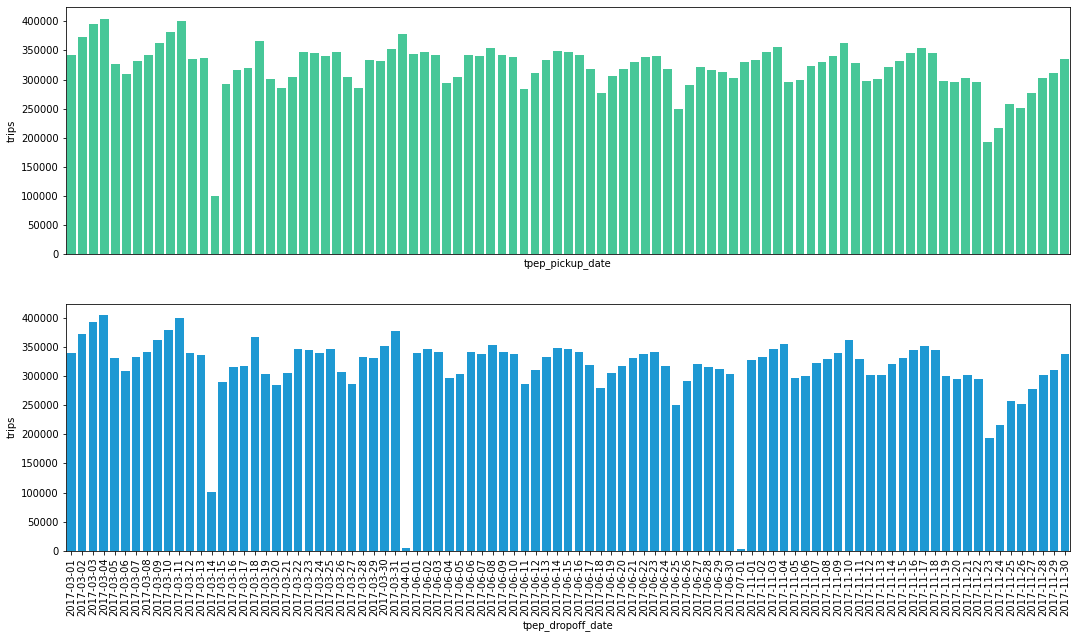

In [21]:
f, axes = plt.subplots(2, 1)

f.set_figheight(10)
f.set_figwidth(18)

df = trips.groupby('tpep_pickup_date').size().to_frame('trips').reset_index()
df2 = trips.groupby('tpep_dropoff_date').size().to_frame('trips').reset_index()

sns.barplot(x='tpep_pickup_date', y="trips", data=df, ax=axes[0], color = '#32dc9e')
sns.barplot(x='tpep_dropoff_date', y="trips", data=df2, ax=axes[1], color = '#00a4f1')

plt.sca(axes[0])
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.sca(axes[1])
plt.tick_params(
axis = 'x',
rotation = 90) 

##### Payment type

La dimension del dataset es demasiado grande, vamos a estudiar si podemos eliminar registros para reducir su dimensión de acuerdo al propósito del ejercicio de contruir un modelo para predecir la cantidad de propina en cada trayecto.

Observando la descripción del dataset:

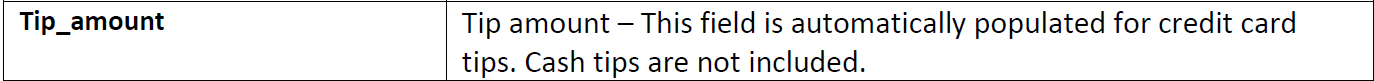

Vemos que las propinas en efectivo no están incluidas, por lo que las eliminamos.

Payment_type:

    1 = Credit card
    2 = Cash
    3 = No charge
    4 = Dispute
    5 = Unknown
    6 = Voided trip

In [22]:
pie_trips = trips.groupby(['payment_type']).size().to_frame('Total trips')
pie_trips

,Total trips
payment_type,
1,19841923
2,9193258
3,154068
4,43703
5,1


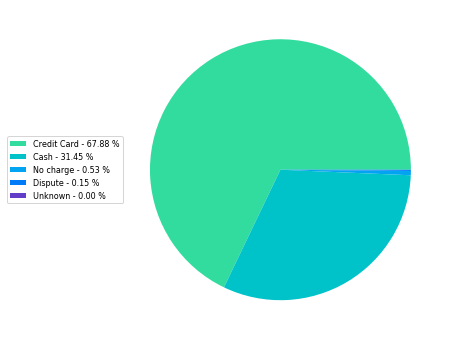

In [23]:
# Pie chart
labels = ['Credit Card', 'Cash', 'No charge', 'Dispute', 'Unknown']
sizes = pie_trips['Total trips'].values

plt.figure(figsize=(8, 6))
plt.pie(sizes,colors=['#32dc9e','#00c3ca','#00a4f1','#007bf7','#623dc8'])

labels2 = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(labels, 100.*sizes/sizes.sum())]
plt.legend(labels2, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.show()

Analizamos el espectro de propinas para las formas de pago distintas a credit cash

###### Payment type - distributions

Text(0.5, 1.0, 'Dispute')

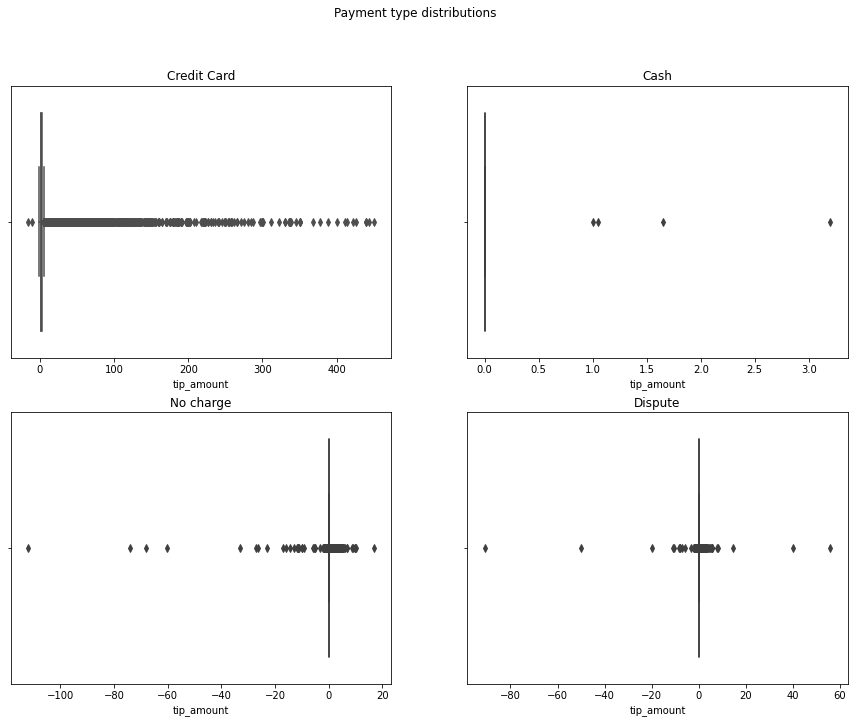

In [25]:
f, axes = plt.subplots(2, 2)

f.set_figheight(11)
f.set_figwidth(15)
sns.boxplot(x=trips.loc[trips['payment_type']==1]['tip_amount'], ax=axes[0][0], color = '#623dc8')
sns.boxplot(x=trips.loc[trips['payment_type']==2]['tip_amount'], ax=axes[0][1])
sns.boxplot(x=trips.loc[trips['payment_type']==3]['tip_amount'], ax=axes[1][0])
sns.boxplot(x=trips.loc[trips['payment_type']==4]['tip_amount'], ax=axes[1][1])

f.suptitle('Payment type distributions')

axes[0, 0].set_title('Credit Card')
axes[0, 1].set_title('Cash')
axes[1, 0].set_title('No charge')
axes[1, 1].set_title('Dispute')


Therefore, we are left with only the payment method = 1 (credit card), since we have seen that the rest of the payment methods are not representative for our model, since the entire distribution is around 0, and corresponds with the description.

In [6]:
trips = trips.loc[trips['payment_type']==1]
trips.shape

(19841923, 17)

###  Individual analysis of the variables

We compute the histogram of all variables. To view their distribution and detect outliers

##### Cuantitative variables

<AxesSubplot:xlabel='tip_amount'>

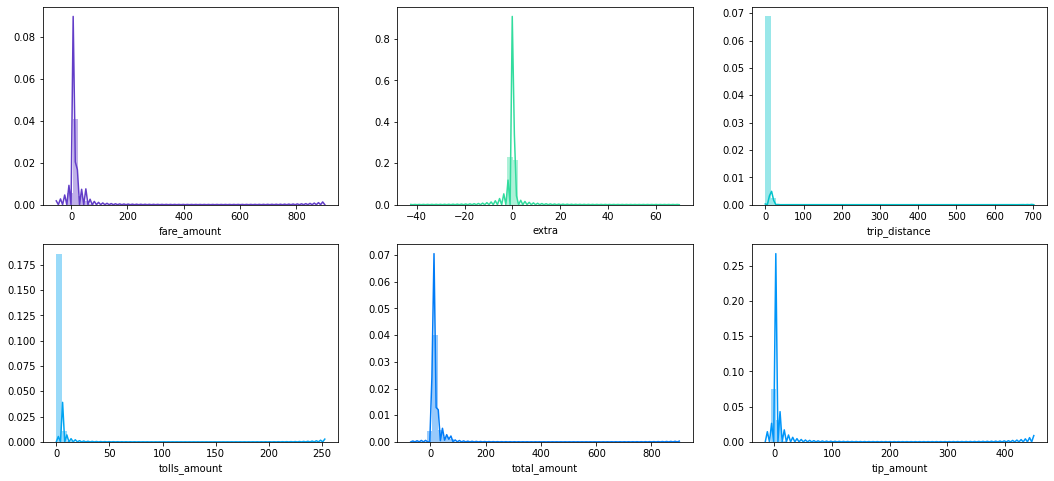

In [27]:
f, axes = plt.subplots(2, 3)

f.set_figheight(8)
f.set_figwidth(18)

sns.distplot(trips['fare_amount'], ax=axes[0][0], color = '#623dc8')
sns.distplot(trips['extra'], ax=axes[0][1], color = '#32dc9e')
sns.distplot(trips['trip_distance'], ax=axes[0][2], color = '#00c3ca')

sns.distplot(trips['tolls_amount'], ax=axes[1][0], color = '#00a4f1')
sns.distplot(trips['total_amount'], ax=axes[1][1], color = '#007bf7')
sns.distplot(trips['tip_amount'], ax=axes[1][2], color = '#0095f9')

Analyzing the distributions of the quantitative variables we can eliminate the outliers and keep the following hypotheses:
    - trip distance < 100
    - total amount < 200
    - toll amount < 50
    - extra > 0
    - tip amount >= 0

In [7]:
trips = trips[(trips['trip_distance']<=100) & (trips['total_amount']<=100) & (trips['total_amount']>0) & (trips['tolls_amount']< 20) & (trips['extra']>= 0) & (trips['tip_amount']>= 0)]
trips.shape

(19792158, 17)

After filtering

<AxesSubplot:xlabel='tip_amount'>

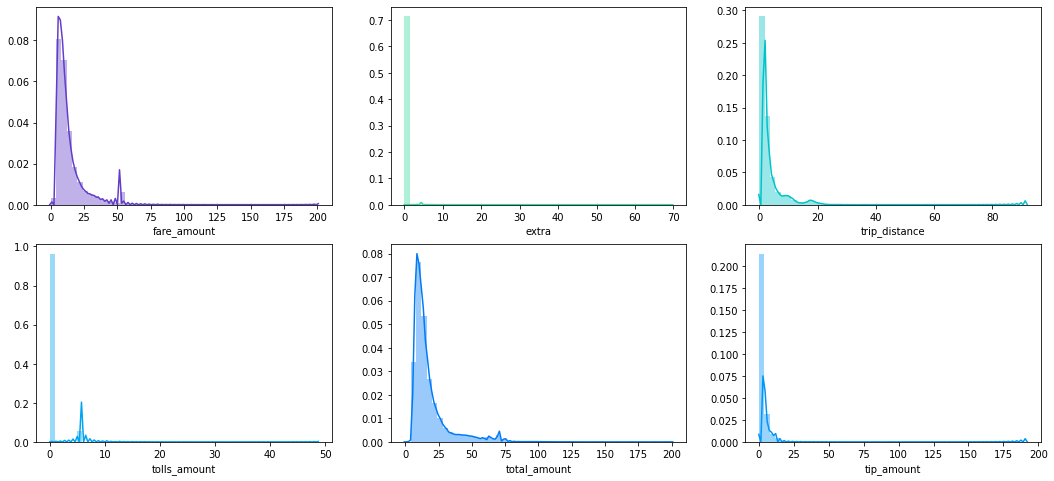

In [29]:
f, axes = plt.subplots(2, 3)

f.set_figheight(8)
f.set_figwidth(18)

sns.distplot(trips['fare_amount'], ax=axes[0][0], color = '#623dc8')
sns.distplot(trips['extra'], ax=axes[0][1], color = '#32dc9e')
sns.distplot(trips['trip_distance'], ax=axes[0][2], color = '#00c3ca')

sns.distplot(trips['tolls_amount'], ax=axes[1][0], color = '#00a4f1')
sns.distplot(trips['total_amount'], ax=axes[1][1], color = '#007bf7')
sns.distplot(trips['tip_amount'], ax=axes[1][2], color = '#0095f9')

###### Passenger count

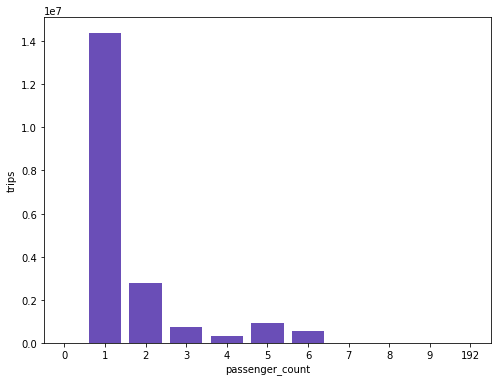

In [30]:
df = trips.groupby('passenger_count').size().to_frame('trips').reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='passenger_count', y="trips", data=df, color = '#623dc8')
plt.show()

By law, the maximum number of passengers is 6 (maximum): https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page#:~:text=The%20maximum%20amount%20of%20passengers,of%20an%20adult%20passenger%20seated

We can see that there are some trips with 0 passenger or trips with 7-9 passengers, but they are an outlier, so we eliminate them.

In [8]:
trips = trips[(trips['passenger_count']<=6) & (trips['passenger_count']>0)]

##### Vendor id & Store_and_fwd_flag

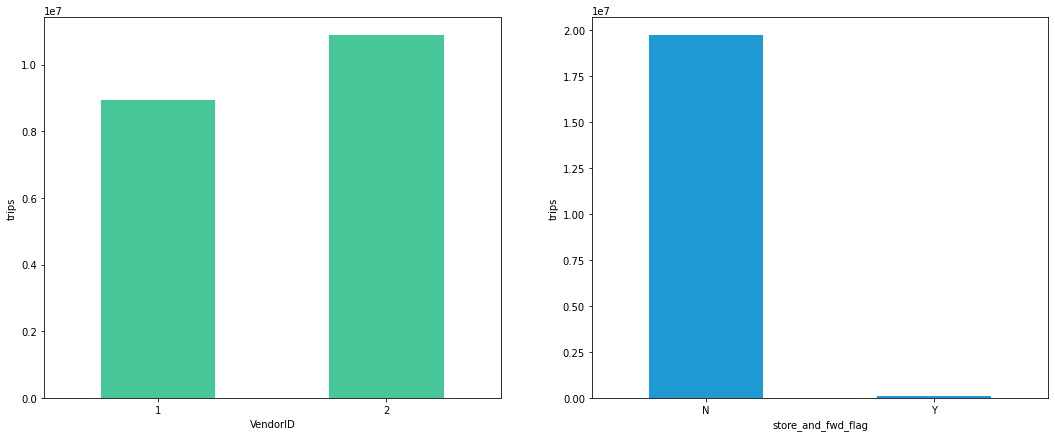

In [33]:
f, axes = plt.subplots(1, 2)

f.set_figheight(7)
f.set_figwidth(18)

df = trips.groupby('VendorID').size().to_frame('trips').reset_index()
df2 = trips.groupby('store_and_fwd_flag').size().to_frame('trips').reset_index()

sns.barplot(x='VendorID', y="trips", data=df, ax=axes[0], color = '#32dc9e')
sns.barplot(x='store_and_fwd_flag', y = 'trips', data=df2, ax=axes[1], color = '#00a4f1', dodge=False)

widthbars = [0.5, 0.5] 

# change the width bar
for ax in enumerate(axes):
    for bar, newwidth in zip(ax[1].patches, widthbars):
        x = bar.get_x()
        width = bar.get_width()
        centre = x + width/2.
        bar.set_x(centre - newwidth/2.)
        bar.set_width(newwidth)


The store_and_fwd_flag atribute, indicating whether the trip data was sent immediately to the vendor (“N”) or held in the memory of the taxi because there was no connection to the server (“Y”). On the left graphic, we can appreciate that Vendor 2 has significantly more trips in this data set than vendor 1 (logarithmic and axis).

## Feature engineering

In [9]:
# Create new atributes from date
trips['pickup_year'] = trips['tpep_pickup_datetime'].dt.year
trips['pickup_month'] = trips['tpep_pickup_datetime'].dt.month
trips['pickup_weekday_num'] = trips['tpep_pickup_datetime'].dt.weekday
trips['pickup_hour'] = trips['tpep_pickup_datetime'].dt.hour

# create atributes from distance and time trip
trips['duration'] = trips['tpep_dropoff_datetime'] - trips['tpep_pickup_datetime']
trips['duration_hour'] = trips['duration'] / np.timedelta64(1, 'h')
trips['duration_min'] = trips['duration'] / np.timedelta64(1, 'm')

# speed in milles/h
trips['trip_speed_mph'] = trips['trip_distance']/trips['duration_hour']

# Percentage of tips
trips['tip_percentage'] = 100*(trips['tip_amount']/trips['total_amount'])

#### Analysis new atributes
##### Duration

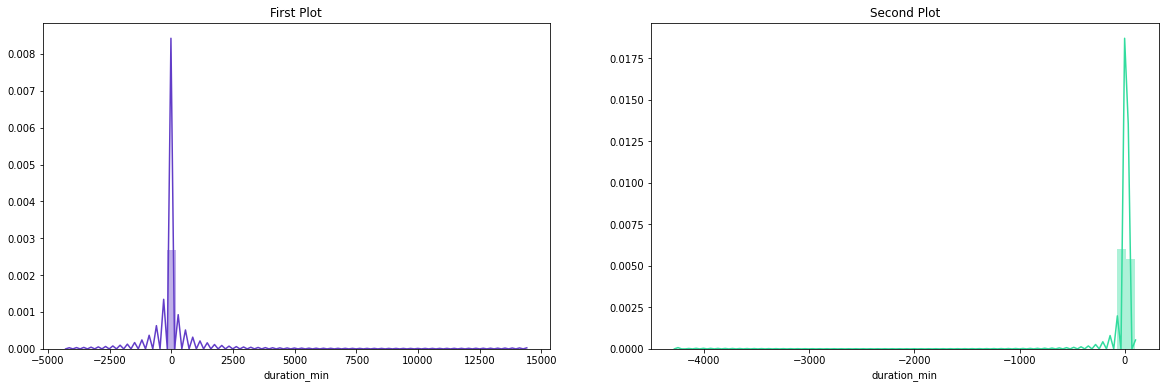

In [35]:
f, axes = plt.subplots(1, 2)

f.set_figheight(6)
f.set_figwidth(20)

sns.distplot(trips['duration_min'], ax=axes[0], color = '#623dc8')
sns.distplot(trips.loc[trips['duration_min']<100]['duration_min'], ax=axes[1], color = '#32dc9e')

axes[0].title.set_text('Duration')
axes[1].title.set_text('Duration after filtering')

In the graph on the left we have the distribution of the raw duration, and in the graph on the right the representation of the distribution removing the trips with more than 100 min, since they are outiers. As we see in the table below, are mostly correspond to meter errors. We check for negative durations because tpep_dropoff_datetime < tpep_pickup_datetime and we need to remove them.

In [65]:
trips.loc[trips['duration_min']>=110].head().style.apply(custom_style, axis=1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tpep_pickup_date,tpep_dropoff_date,pickup_year,pickup_month,pickup_weekday_num,pickup_hour,duration,duration_hour,duration_min,trip_speed_mph,tip_percentage
624,2,2017-03-01 00:57:07,2017-03-02 00:46:21,1,1.14,1,N,114,211,1,6.5,0.5,0.5,0.78,0,0.3,8.58,2017-03-01,2017-03-02,2017,3,2,0,0 days 23:49:14,23.8206,1429.23,0.0478578,9.09091
4807,2,2017-03-01 00:05:22,2017-03-01 23:49:48,5,0.78,1,N,164,170,1,5,0.5,0.5,0,0,0.3,6.3,2017-03-01,2017-03-01,2017,3,2,0,0 days 23:44:26,23.7406,1424.43,0.0328552,0
4896,2,2017-03-01 00:45:07,2017-03-02 00:25:40,1,8.38,1,N,161,228,1,28,0.5,0.5,5.86,0,0.3,35.16,2017-03-01,2017-03-02,2017,3,2,0,0 days 23:40:33,23.6758,1420.55,0.353947,16.6667
5638,2,2017-03-01 00:00:00,2017-03-01 06:46:27,1,4.7,1,N,132,10,1,15.5,0.3,0.5,0,0,0.3,16.6,2017-03-01,2017-03-01,2017,3,2,0,0 days 06:46:27,6.77417,406.45,0.693812,0
6240,2,2017-03-01 00:29:17,2017-03-02 00:00:00,1,6.25,1,N,230,97,1,21.5,0.5,0.5,4.56,0,0.3,27.36,2017-03-01,2017-03-02,2017,3,2,0,0 days 23:30:43,23.5119,1410.72,0.265822,16.6667


As we mentioned before, the durations > 100 min correspond to possible errors since the distances covered in miles are very small for such excessive periods.

In [10]:
trips = trips.loc[(trips['duration_min']>0) & (trips['duration_min']<100)]

##### Speed

Speed is the ratio of trip_distance to trip_duration. We have to eliminate all the trips with a speed higher than 200 mph  since this is next to the highest speed for cars commonly used as taxi, in addition the speed limit in NYC is 50 mph but it might be sometimes violated. So, if we see the distribution we use the limit of 120 mph, to keep most of the options.

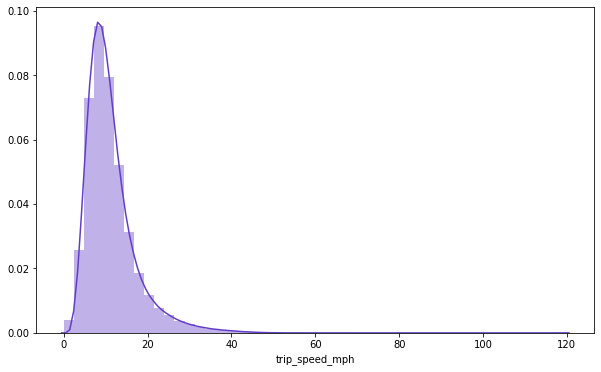

In [67]:
plt.figure(figsize=(10, 6))
sns.distplot(trips.loc[trips['trip_speed_mph']<120]['trip_speed_mph'],  color = '#623dc8')

plt.show()

The distributions looks good, because most of the trips are under 50 mph

In [11]:
#now with the speed we can eliminate outliers
trips = trips.loc[trips['trip_speed_mph']<100]

## Saving the dataset

We save the preprocessed dataset in pickle format.

In [3]:
# save to pickle
trips.to_pickle('/../Data/processed/data_preprocessed.pkl')

## Optional datasets

##### Weather in NYC in 2017

Due to the capacity of my computer, it has been impossible for me to join the auxiliary datasets to the raw data, due to memory problems. That is why this step is indicative but it has been done in the following notebooks.

In [15]:
weather = pd.read_csv('/../Data/external/data_weather_2017.csv')

In [16]:
weather = weather[['DATE','AWND','PRCP','SNOW','SNWD','TMAX','TMIN']]
weather['TAVG'] = (weather['TMAX']+weather['TMIN'])/2
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather = weather.drop(columns=['TMAX','TMIN'])

In [17]:
trips['date'] = trips['tpep_pickup_datetime'].dt.normalize()
trips = pd.DataFrame(pd.merge(trips, weather, left_on='date', right_on='DATE')).drop('DATE', axis=1)

In [17]:
trips.shape

(19789609, 34)

##### Taxi Zone shapefile - zones 

Another interesting variable is knowing in which direction the taxi is going. Due to the computational capacity of my computer, we are going to create simple variables, to see if it impacts the tip provided by the passenger.

To know the address we need to calculate the pick-up and arrival coordinates. The hypothesis is that the traffic can affect the mood of the passenger when it comes to giving a tip, or the pick-up area as well as the arrival can have a great influence.

In order to get the coordinates of the trips we need the coordinates of the pick-up and drop-off areas. We use the files:

    Taxi Zone Lookup Table (CSV)
    Taxi Zone Shapefile (ZIP)

From https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [16]:
# taxi zone shapefile from https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
sf_zones = gpd.read_file('/../Data/external/taxi_zones.shp')
zone = pd.read_csv("/../Data/external/taxi_zone_lookup.csv")

# Coordinate Reference Systems
sf_zones['geometry'] = sf_zones['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
sf_zones['lon'] = sf_zones.centroid.x
sf_zones['lat'] = sf_zones.centroid.y

In [17]:
trips_zones = pd.merge(trips, sf_zones, left_on='PULocationID', right_on='LocationID')

In [18]:
trips_zones = pd.merge(trips_zones, sf_zones, left_on='DOLocationID', right_on='LocationID')

In [19]:
trips_zones.rename(columns = {'geometry_x':'geometry_pu', 'geometry_y':'geometry_do', 
                              'lon_x':'lon_pu', 'lon_y':'lon_do',
                              'lat_x':'lat_pu', 'lat_y':'lat_do',
                              'zone_x':'zone_pu', 'zone_y':'zone_do',
                              'OBJECTID_x':'OBJECTID_pu', 'OBJECTID_y':'OBJECTID_do',
                              'LocationID_x':'LocationID_pu', 'LocationID_y':'LocationID_do',
                              'borough_x':'borough_pu', 'borough_y':'borough_do',
                              'Shape_Leng_x':'Shape_Leng_pu', 'Shape_Leng_y':'Shape_Leng_do',
                              'Shape_Area_x':'Shape_Area_pu', 'Shape_Area_y':'Shape_Area_do' }, inplace = True)